In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def region_growing(img, seed):
    neighbors = [(0, 1), (1, 0), (-1, 0), (0, -1)]  # 4-connectivity
    region_threshold = 10
    region_size = 1
    region_mean = float(img[seed])

    # Initialize the list of growth points
    growth_points = [seed]

    # Mark array to indicate whether a pixel has been segmented
    segmented = np.zeros_like(img, dtype=np.bool)

    while len(growth_points) > 0:
        new_points = []
        for point in growth_points:
            for neighbor in neighbors:
                # Calculate the position of neighboring pixel
                x_new = point[0] + neighbor[0]
                y_new = point[1] + neighbor[1]

                # Check if the neighboring pixel is outside the image boundaries
                if x_new < 0 or y_new < 0 or x_new >= img.shape[0] or y_new >= img.shape[1]:
                    continue

                # Check if the neighboring pixel has already been segmented
                if segmented[x_new, y_new]:
                    continue

                pixel_value = img[x_new, y_new]
                if abs(pixel_value - region_mean) < region_threshold:
                    segmented[x_new, y_new] = True
                    region_size += 1
                    region_mean = (region_mean * (region_size - 1) + pixel_value) / region_size
                    new_points.append((x_new, y_new))
        growth_points = new_points

    return segmented

In [20]:
# Read the image
image = cv2.imread('assignment/Easy/118035.jpg', 0)

In [19]:
image.shape

(321, 481)

In [30]:
# Set the seed point
seed_point = (50, 400)

In [31]:
# Apply the region growing algorithm
segmented_image = region_growing(image, seed_point)

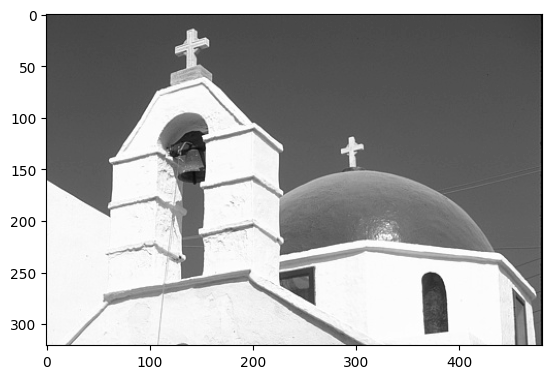

In [32]:
plt.imshow(image, cmap='gray')

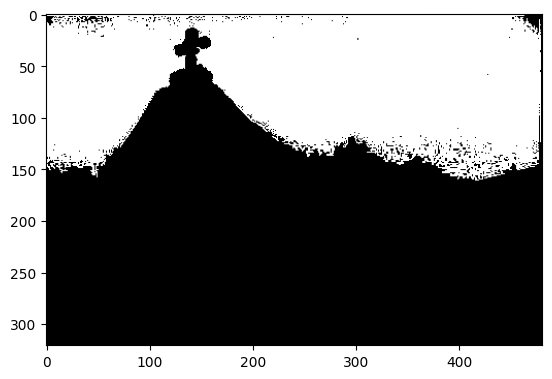

In [33]:
plt.imshow(segmented_image, cmap='gray')